In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1:Load the dataset
data = pd.read_csv('BostonHousing.csv')  
# Check the columns of the dataset to select relevant features
print(data.columns)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [16]:
# Select relevant features and the target variable 'medv' (house price)
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
            'ptratio', 'b', 'lstat']
target = 'medv'  # 'medv' should be lowercase to match the dataset

# Now select features and target from the dataset
X = data[features]
y = data[target]


In [21]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Proceed with the clean data
X_cleaned = data_cleaned[features]
y_cleaned = data_cleaned[target]

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [41]:
# 2. Polynomial Feature Transformation
poly = PolynomialFeatures(degree=2)  # degree to 2 or 3
X_train_poly = poly.fit_transform(X_train)
poly_feature_names = poly.get_feature_names_out(X_train.columns)
X_test_poly =pd.DataFrame(X_train_poly, columns=poly_feature_names)
print(X_test_poly.head())

     1     crim    zn  indus  chas    nox     rm   age     dis   rad  ...  \
0  1.0  5.29305   0.0  18.10   0.0  0.700  6.051  82.5  2.1678  24.0  ...   
1  1.0  1.25179   0.0   8.14   0.0  0.538  5.570  98.1  3.7979   4.0  ...   
2  1.0  0.24103   0.0   7.38   0.0  0.493  6.083  43.7  5.4159   5.0  ...   
3  1.0  0.03041   0.0   5.19   0.0  0.515  5.895  59.6  5.6150   5.0  ...   
4  1.0  0.15445  25.0   5.13   0.0  0.453  6.145  29.2  7.8148   8.0  ...   

      tax^2  tax ptratio      tax b  tax lstat  ptratio^2  ptratio b  \
0  443556.0      13453.2  252001.08   12494.16     408.04   7643.276   
1   94249.0       6447.0  115606.99    6453.14     441.00   7907.970   
2   82369.0       5625.2  113910.30    3670.73     384.16   7779.240   
3   50176.0       4524.8   88437.44    2365.44     408.04   7975.162   
4   80656.0       5594.8  110953.12    1948.24     388.09   7696.396   

   ptratio lstat          b^2    b lstat   lstat^2  
0        378.952  143171.4244  7098.4088  351.9376 

In [26]:
# 3. Apply L1 (Lasso) and L2 (Ridge) Penalty
# 3.1 Lasso (L1) Regularization
lasso_model = Lasso(alpha=0.1)  # L1 regularization
lasso_model.fit(X_train_poly, y_train)


C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.961e+03, tolerance: 3.492e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [27]:
# 3.2 Ridge (L2) Regularization
ridge_model = Ridge(alpha=1.0)  # L2 regularization
ridge_model.fit(X_train_poly, y_train)

Ridge()

In [28]:
# 4. Model Training and Testing
# Predict on the test set with Lasso
y_pred_lasso = lasso_model.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [29]:
# Predict on the test set with Ridge
y_pred_ridge = ridge_model.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


In [30]:
print("Lasso Regression (L1 Penalty):")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.2f}")

print("\nRidge Regression (L2 Penalty):")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")

Lasso Regression (L1 Penalty):
Mean Squared Error: 10.02
R-squared: 0.86

Ridge Regression (L2 Penalty):
Mean Squared Error: 11.88
R-squared: 0.84


In [31]:
# 5. Plotting the predictions against actual values for both models
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'Predicted Prices')

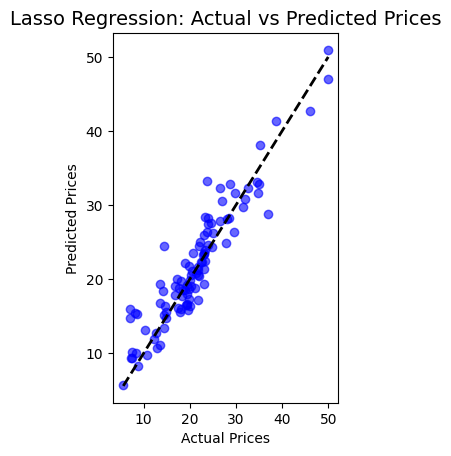

In [32]:
# Lasso Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Lasso Regression: Actual vs Predicted Prices", fontsize=14)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")


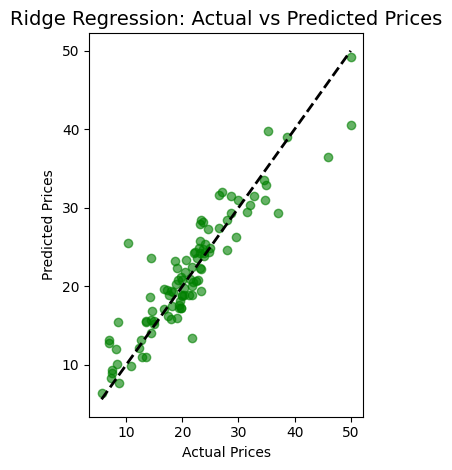

In [36]:
# Ridge Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Ridge Regression: Actual vs Predicted Prices", fontsize=14)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.tight_layout()
plt.show()
